In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#DATA Preprocessing:
#droping unimportant columns
df=df.drop(columns=["CustomerID","Genre","Age"],axis=1)

In [6]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
#Finding the null values
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)'>

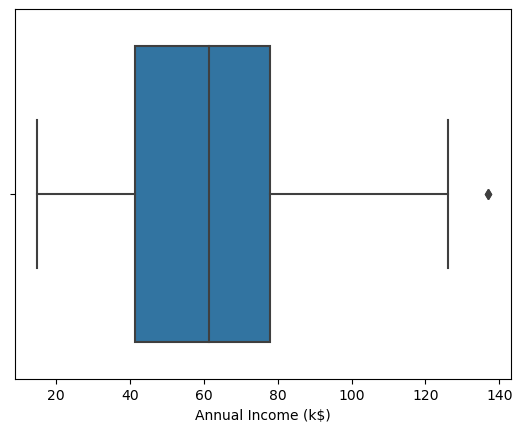

In [8]:
#Checking the outlier
sns.boxplot(x="Annual Income (k$)",data=df)

In [9]:
#APPLYIng the winsorizer to remove the outlier
from feature_engine.outliers import Winsorizer
win= Winsorizer(capping_method="iqr",tail="both",fold=1.5)
df["Annual Income (k$)"]=win.fit_transform(df[["Annual Income (k$)"]])

<AxesSubplot:xlabel='Spending Score (1-100)'>

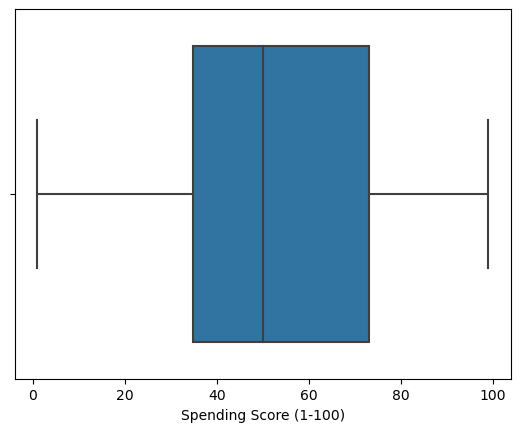

In [10]:
sns.boxplot(x="Spending Score (1-100)", data=df)

In [11]:
df["Spending Score (1-100)"].skew()

-0.047220201374263374

In [12]:
X=df

## ELBOW CURVE:

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
print(wcss)    

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[268717.56375, 180456.9539366883, 105529.6365152151, 72861.05249259228, 43639.878158556414, 36640.0775425058, 29815.329366376376, 24598.795598520326, 22744.406719161947, 19233.097696005545]


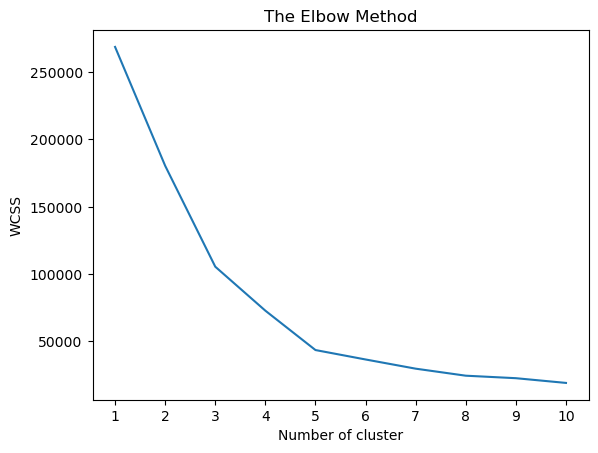

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

# K-Means Model:

In [18]:
#Modelling
kmeans=KMeans(n_clusters=5,init="k-means++")

#predict
y_means=kmeans.fit_predict(X)
y_means

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [19]:
df["cluster"]=pd.DataFrame(y_means)

# Visualize the cluster:

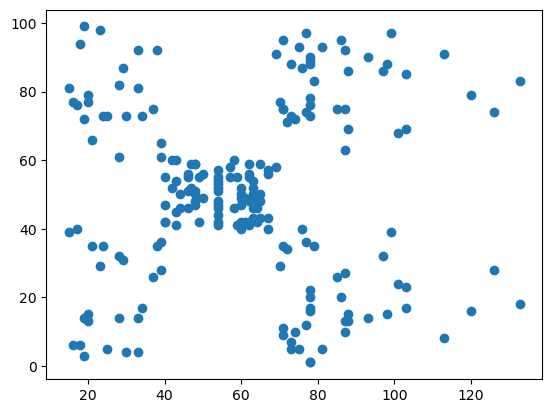

In [20]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()